In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import patches, text, patheffects

In [3]:
import run_detector as main 
import cpu_detection as detector

In [4]:
detections = pd.read_csv('Precision_Recall_detections.csv')

In [5]:
dets_np = detections.to_numpy() # Convert to Numpy array with .to_numpy() 
#print(dets_np.shape)    

In [6]:
start_times = dets_np[:, 3] # Glucose column
#print(start_times.shape)

In [7]:
# load data
data_dir = 'ub_calls'          # this is the path to your audio files
do_time_expansion = True       # if audio is already time expanded set this to False

# read audio files
audio_files = main.get_audio_files(data_dir)

In [10]:
file_num = 9
print("There are " + str(len(audio_files)) + " files")
file_name = audio_files[file_num-1]
file_name_basename = file_name[len(data_dir):]
print(audio_files)
print(file_name)

There are 15 files
['ub_calls/20210921_030000_HFonly_8s.wav', 'ub_calls/20210909_03_carppond_1245_1sec2.wav', 'ub_calls/20210921_03000045test2.wav', 'ub_calls/20210921_03000045test3.wav', 'ub_calls/20210921_030000test.wav', 'ub_calls/20210909_03_carppond_1230_1sec.wav', 'ub_calls/20210921_03000045test4.wav', 'ub_calls/20210910_070000_bat_party.wav', 'ub_calls/20210909_03_carppond_1230to1302(PRC).wav', 'ub_calls/20210910_030000HFnLF_2sec.wav', 'ub_calls/20210909_03_carppond_1245_1sec2_playable.wav', 'ub_calls/20210921_03000045test5.wav', 'ub_calls/20210921_030000_HFnLF_5s.wav', 'ub_calls/test_file.wav', 'ub_calls/20210909_03_carppond_1245_1sec.wav']
ub_calls/20210909_03_carppond_1230to1302(PRC).wav


In [11]:
# load and create the detector    
det_model_file = 'models/detector.npy'
# The parameters are in models/detector_params.json
det_params_file = det_model_file[:-4] + '_params.json'
# Method CPUDetector is in cpu_detection.py
det = detector.CPUDetector(det_model_file, det_params_file)

In [12]:
# read audio file - skip file if can't read it
read_fail, audio, file_dur, samp_rate, samp_rate_orig = main.read_audio(file_name,
                        do_time_expansion, det.chunk_size, det.win_size)

In [13]:
# Calling our method here to plot a figure for each file in the directory
#main.plot_calls(audio, samp_rate_orig, det, start_times)

In [14]:
#num_calls = len(start_times)
#print('  ' + str(num_calls) + ' calls found')

In [15]:
detection_thresh = 0.80
    
det_time, det_prob  = main.run_model(det, audio, file_dur, samp_rate,
                                detection_thresh, do_time_expansion)

In [16]:
# Calling our method here to plot a figure for each file in the directory
#main.plot_calls(audio, samp_rate_orig, det, det_time)

#num_calls = len(det_time)
#print('  ' + str(num_calls) + ' calls found')
#print(start_times)

In [17]:
start_times.sort()

In [18]:
def prec_rec(start_times, det_time, error):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    start_time_index = 0
    det_index = 0

    while det_index < len(det_time) and start_time_index < len(start_times):
        #print("\nComparing "+str(det_time[det_index])+" with "+str(start_times[start_time_index]))
        if ((det_time[det_index] <= (start_times[start_time_index]+error)) and (det_time[det_index] >= (start_times[start_time_index]-error))):
            TP+=1
            start_time_index+=1
            #print("There is a match! Calls detected correctly (it exists in both directories)")
            #print("TP value is", TP)
        else:
            if (det_time[det_index] > (start_times[start_time_index]+error)):
                FN+=1
                det_index-=1
                start_time_index+=1
                #print("There is no match! Call undetected incorrectly (it does exist)")
                #print("FN value is", FN)
            else:
                FP+=1
                #print("There is no match! Call detected incorrectly (it does not exist)")
                #print("FP value is", FP)
        det_index+=1

    #print(TP, FP, FN)
    precision = TP/float(TP+FP)
    recall = TP/float(TP+FN)

    return precision, recall

In [22]:
detection_thresh_arr_err = np.arange(0, 101, 1.0)/100
precision_err = np.zeros(101)
recall_err = np.zeros(101)
error = 0.05 # +/- 0.05 seconds

for slot, detection_thresh in enumerate(detection_thresh_arr_err):
        print("Error: ", err, "Threshold: ", detection_thresh)
        det_time, det_prob  = main.run_model(det, audio, file_dur, samp_rate,
                                    detection_thresh, do_time_expansion)

        precision_err[slot], recall_err[slot] = prec_rec(start_times, det_time, err)

('Error: ', 0.05, 'Threshold: ', 0.0)
('Error: ', 0.05, 'Threshold: ', 0.01)
('Error: ', 0.05, 'Threshold: ', 0.02)
('Error: ', 0.05, 'Threshold: ', 0.03)
('Error: ', 0.05, 'Threshold: ', 0.04)
('Error: ', 0.05, 'Threshold: ', 0.05)
('Error: ', 0.05, 'Threshold: ', 0.06)
('Error: ', 0.05, 'Threshold: ', 0.07)
('Error: ', 0.05, 'Threshold: ', 0.08)
('Error: ', 0.05, 'Threshold: ', 0.09)
('Error: ', 0.05, 'Threshold: ', 0.1)
('Error: ', 0.05, 'Threshold: ', 0.11)
('Error: ', 0.05, 'Threshold: ', 0.12)
('Error: ', 0.05, 'Threshold: ', 0.13)
('Error: ', 0.05, 'Threshold: ', 0.14)
('Error: ', 0.05, 'Threshold: ', 0.15)
('Error: ', 0.05, 'Threshold: ', 0.16)
('Error: ', 0.05, 'Threshold: ', 0.17)
('Error: ', 0.05, 'Threshold: ', 0.18)
('Error: ', 0.05, 'Threshold: ', 0.19)
('Error: ', 0.05, 'Threshold: ', 0.2)
('Error: ', 0.05, 'Threshold: ', 0.21)
('Error: ', 0.05, 'Threshold: ', 0.22)
('Error: ', 0.05, 'Threshold: ', 0.23)
('Error: ', 0.05, 'Threshold: ', 0.24)
('Error: ', 0.05, 'Threshold

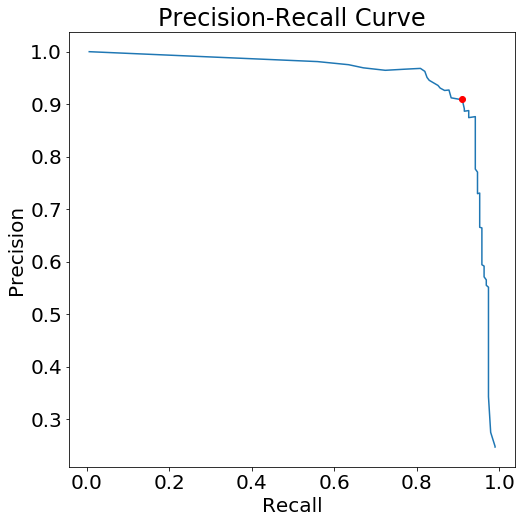

In [45]:
fsize=20
fig = plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = str(fsize)
plt.plot(recall_err, precision_err)
plt.plot(recall_err[80], precision_err[80], 'ro')

#add axis labels to plot
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')

#display plot
plt.show()

In [36]:
for i in range(len(precision_err)):
    if(recall_err[i]==precision_err[i]):
        print(i, recall_err[i], precision_err[i])

(80, 0.9095744680851063, 0.9095744680851063)


In [20]:
detection_thresh_arr_err = np.arange(0, 100, 1.0)/100
precision_err = np.zeros((4, 100))
recall_err = np.zeros((4, 100))
#print(precision_err)

for error_slot in range(0, 4):
    err = error_slot*0.025 + 0.025
    print("Checking for error = ", err)
    for slot, detection_thresh in enumerate(detection_thresh_arr_err):
        print("Error: ", err, "Threshold: ", detection_thresh)
        det_time, det_prob  = main.run_model(det, audio, file_dur, samp_rate,
                                    detection_thresh, do_time_expansion)

        precision_err[error_slot][slot], recall_err[error_slot][slot] = prec_rec(start_times, det_time, err)

('Checking for error = ', 0.05)
('Error: ', 0.05, 'Threshold: ', 0.0)
('Error: ', 0.05, 'Threshold: ', 0.01)
('Error: ', 0.05, 'Threshold: ', 0.02)
('Error: ', 0.05, 'Threshold: ', 0.03)
('Error: ', 0.05, 'Threshold: ', 0.04)
('Error: ', 0.05, 'Threshold: ', 0.05)
('Error: ', 0.05, 'Threshold: ', 0.06)
('Error: ', 0.05, 'Threshold: ', 0.07)
('Error: ', 0.05, 'Threshold: ', 0.08)
('Error: ', 0.05, 'Threshold: ', 0.09)
('Error: ', 0.05, 'Threshold: ', 0.1)
('Error: ', 0.05, 'Threshold: ', 0.11)
('Error: ', 0.05, 'Threshold: ', 0.12)
('Error: ', 0.05, 'Threshold: ', 0.13)
('Error: ', 0.05, 'Threshold: ', 0.14)
('Error: ', 0.05, 'Threshold: ', 0.15)
('Error: ', 0.05, 'Threshold: ', 0.16)
('Error: ', 0.05, 'Threshold: ', 0.17)
('Error: ', 0.05, 'Threshold: ', 0.18)
('Error: ', 0.05, 'Threshold: ', 0.19)
('Error: ', 0.05, 'Threshold: ', 0.2)
('Error: ', 0.05, 'Threshold: ', 0.21)
('Error: ', 0.05, 'Threshold: ', 0.22)
('Error: ', 0.05, 'Threshold: ', 0.23)
('Error: ', 0.05, 'Threshold: ', 0.

IndexError: index 100 is out of bounds for axis 0 with size 100

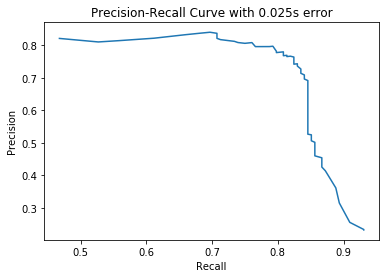

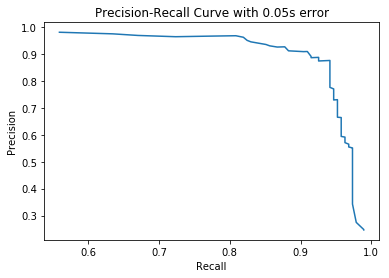

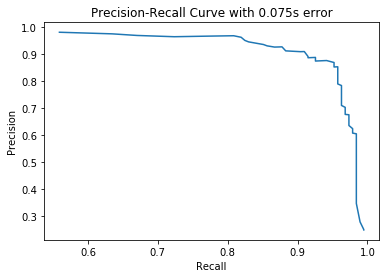

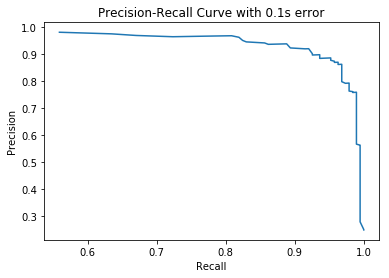

In [24]:
for error_slot in range(1, 2):
    fig, ax = plt.subplots()
    ax.plot(recall_err[error_slot], precision_err[error_slot])

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve with '+str(0.025*error_slot +0.025)+'s error')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()

In [25]:
detection_thresh_arr_err = np.arange(0, 100, 1.0)/100
precision_err = np.zeros((4, 100))
recall_err = np.zeros((4, 100))
#print(precision_err)

for error_slot in range(0, 4):
    err = error_slot*0.01 + 0.01
    print("Checking for error = ", err)
    for slot, detection_thresh in enumerate(detection_thresh_arr_err):
        print("Error: ", err, "Threshold: ", detection_thresh)
        det_time, det_prob  = main.run_model(det, audio, file_dur, samp_rate,
                                    detection_thresh, do_time_expansion)

        precision_err[error_slot][slot], recall_err[error_slot][slot] = prec_rec(start_times, det_time, err)

('Checking for error = ', 0.01)
('Error: ', 0.01, 'Threshold: ', 0.0)
('Error: ', 0.01, 'Threshold: ', 0.01)
('Error: ', 0.01, 'Threshold: ', 0.02)
('Error: ', 0.01, 'Threshold: ', 0.03)
('Error: ', 0.01, 'Threshold: ', 0.04)
('Error: ', 0.01, 'Threshold: ', 0.05)
('Error: ', 0.01, 'Threshold: ', 0.06)
('Error: ', 0.01, 'Threshold: ', 0.07)
('Error: ', 0.01, 'Threshold: ', 0.08)
('Error: ', 0.01, 'Threshold: ', 0.09)
('Error: ', 0.01, 'Threshold: ', 0.1)
('Error: ', 0.01, 'Threshold: ', 0.11)
('Error: ', 0.01, 'Threshold: ', 0.12)
('Error: ', 0.01, 'Threshold: ', 0.13)
('Error: ', 0.01, 'Threshold: ', 0.14)
('Error: ', 0.01, 'Threshold: ', 0.15)
('Error: ', 0.01, 'Threshold: ', 0.16)
('Error: ', 0.01, 'Threshold: ', 0.17)
('Error: ', 0.01, 'Threshold: ', 0.18)
('Error: ', 0.01, 'Threshold: ', 0.19)
('Error: ', 0.01, 'Threshold: ', 0.2)
('Error: ', 0.01, 'Threshold: ', 0.21)
('Error: ', 0.01, 'Threshold: ', 0.22)
('Error: ', 0.01, 'Threshold: ', 0.23)
('Error: ', 0.01, 'Threshold: ', 0.

('Error: ', 0.03, 'Threshold: ', 0.09)
('Error: ', 0.03, 'Threshold: ', 0.1)
('Error: ', 0.03, 'Threshold: ', 0.11)
('Error: ', 0.03, 'Threshold: ', 0.12)
('Error: ', 0.03, 'Threshold: ', 0.13)
('Error: ', 0.03, 'Threshold: ', 0.14)
('Error: ', 0.03, 'Threshold: ', 0.15)
('Error: ', 0.03, 'Threshold: ', 0.16)
('Error: ', 0.03, 'Threshold: ', 0.17)
('Error: ', 0.03, 'Threshold: ', 0.18)
('Error: ', 0.03, 'Threshold: ', 0.19)
('Error: ', 0.03, 'Threshold: ', 0.2)
('Error: ', 0.03, 'Threshold: ', 0.21)
('Error: ', 0.03, 'Threshold: ', 0.22)
('Error: ', 0.03, 'Threshold: ', 0.23)
('Error: ', 0.03, 'Threshold: ', 0.24)
('Error: ', 0.03, 'Threshold: ', 0.25)
('Error: ', 0.03, 'Threshold: ', 0.26)
('Error: ', 0.03, 'Threshold: ', 0.27)
('Error: ', 0.03, 'Threshold: ', 0.28)
('Error: ', 0.03, 'Threshold: ', 0.29)
('Error: ', 0.03, 'Threshold: ', 0.3)
('Error: ', 0.03, 'Threshold: ', 0.31)
('Error: ', 0.03, 'Threshold: ', 0.32)
('Error: ', 0.03, 'Threshold: ', 0.33)
('Error: ', 0.03, 'Threshold

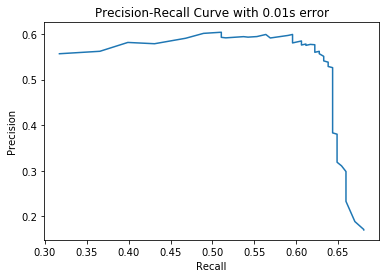

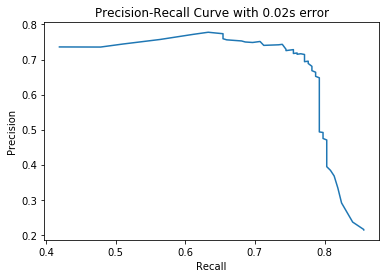

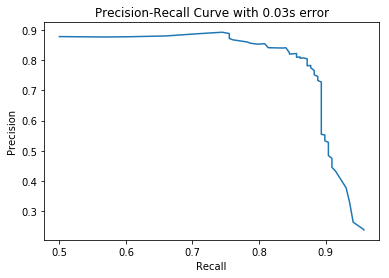

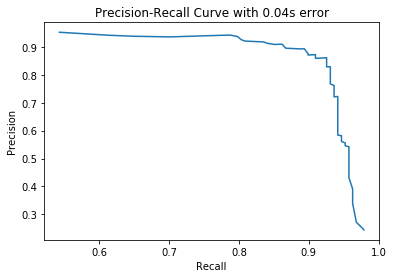

In [27]:
for error_slot in range(0, 4):
    fig, ax = plt.subplots()
    ax.plot(recall_err[error_slot], precision_err[error_slot])

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve with '+str(0.01*error_slot +0.01)+'s error')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()

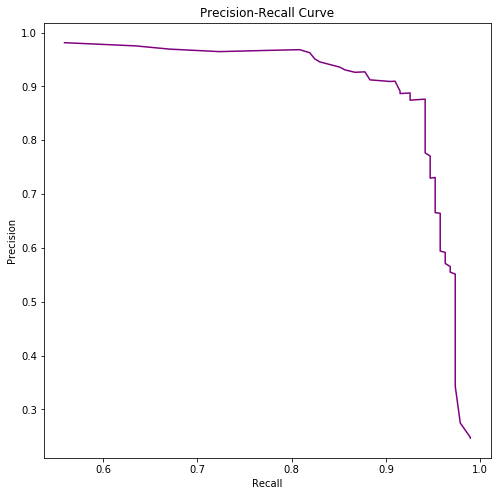

In [52]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

fig.set_figheight(8)
fig.set_figwidth(8)

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [33]:
for i in range(len(precision)):
    if(recall[i]==precision[i]):
        print(i, recall[i], precision[i])

(80, 0.9095744680851063, 0.9095744680851063)


In [50]:
for row in range(0,4):
    for i in range(len(precision_err[row])):
        if(recall_err[row][i]>=precision_err[row][i]-0.00396 and recall_err[row][i]<=precision_err[row][i]+0.00396):
            print(0.01+(row*0.01), i, "R:", recall_err[row][i], "P:", precision_err[row][i])

(0.01, 80, 'R:', 0.5957446808510638, 'P:', 0.5989304812834224)
(0.02, 80, 'R:', 0.7393617021276596, 'P:', 0.7433155080213903)
(0.03, 80, 'R:', 0.8404255319148937, 'P:', 0.8404255319148937)
(0.04, 80, 'R:', 0.8936170212765957, 'P:', 0.8936170212765957)
